# Biological Signals Analysis - Week 10 Homework

## Due: Wednesday, March 27, 2024

**Question 1.1**: Load two datasets provided in 'dataForROC1.csv' and 'dataForROC2.csv'. These datasets contain x and y coordinates of points, and the third column indicates the type of point (0 or 1). Your task is to scatter plot these points using Python. Differentiate between the point types by using the 'c' argument in the scatter plot function to apply color based on the labels.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from sklearn.metrics import roc_curve, auc


# Load the datasets
data1 = pd.read_csv('dataForROC1.csv', names=['x', 'y', 'type'])
data2 = pd.read_csv('dataForROC2.csv', names=['x', 'y', 'type'])

# Extract data and labels for dataset 1
x1 = data1['x']
y1 = data1['y']
labels1 = data1['type']

# Extract data and labels for dataset 2
x2 = data2['x']
y2 = data2['y']
labels2 = data2['type']

# Scatter plot for dataset 1
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(x1, y1, c=labels1)
plt.title('Dataset 1')
plt.xlabel('X')
plt.ylabel('Y')

# Scatter plot for dataset 2
plt.subplot(1, 2, 2)
plt.scatter(x2, y2, c=labels2)
plt.title('Dataset 2')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

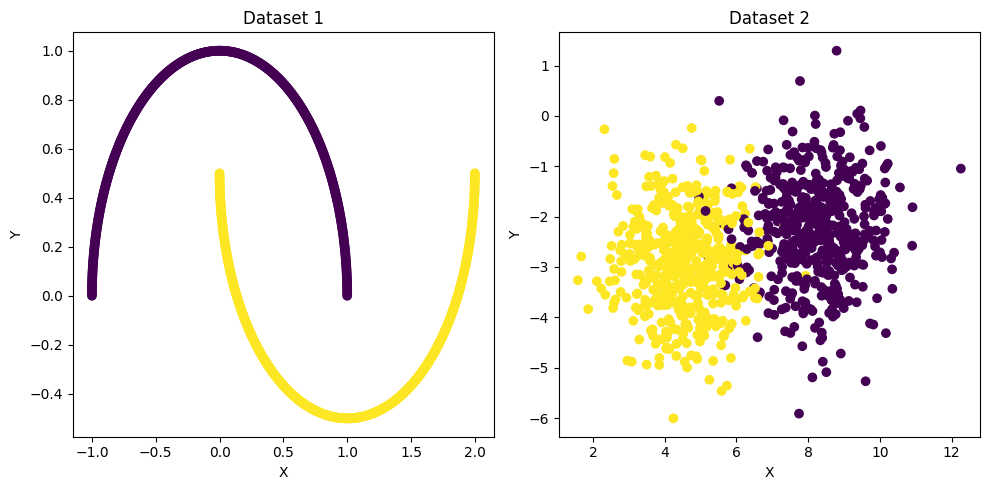

<Figure size 1000x500 with 2 Axes>

**Question 1.2**: Plot two ROC curves for each dataset. For the first ROC curve, use a simple horizontal line as the threshold, moving across the screen to separate the points. For the second ROC curve, devise a threshold function that you think could maximize the area under the curve (AUC) of the ROC. After plotting, discuss your results and the effectiveness of your chosen threshold function in the comments.

In [ ]:


def calculate_roc_horizontal_line(y, labels, z_values):
    hit_rates = []  # True Positive Rates (TPRs)
    false_alarm_rates = []  # False Positive Rates (FPRs)

    for z in z_values:
        tpr = 1 - norm.cdf(z, loc=np.mean(y[labels == 1]), scale=np.std(y[labels == 1]))  # True Positive Rate (TPR)
        fpr = 1 - norm.cdf(z, loc=np.mean(y[labels == 0]), scale=np.std(y[labels == 0]))  # False Positive Rate (FPR)
        hit_rates.append(tpr)
        false_alarm_rates.append(fpr)

    return hit_rates, false_alarm_rates

z_values_1 = np.linspace(y1.min(),  y1.max(), 100)
z_values_2 = np.linspace(y2.min(),  y2.max(), 100)

hit_rates1, false_alarm_rates1 = calculate_roc_horizontal_line( y1, labels1, z_values_1)
hit_rates2, false_alarm_rates2 = calculate_roc_horizontal_line( y2, labels2, z_values_2)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(false_alarm_rates1, hit_rates1, color='darkorange', lw=2, label='ROC curve - Dataset 1')
plt.plot(false_alarm_rates2, hit_rates2, color='blue', lw=2, label='ROC curve - Dataset 2')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve with norm.cdf')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

def best_threshold(x, y, labels):
    distances = np.sqrt(x**2 + y**2)
    fpr, tpr, thresholds = roc_curve(labels, distances)  
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)

    optimal_threshold_index = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_threshold_index]
    print("Optimal Threshold: %f" % optimal_threshold)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
    plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}', s=100)
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
    



best_threshold(x1,y1,labels1)
best_threshold(x2,y2,labels2)




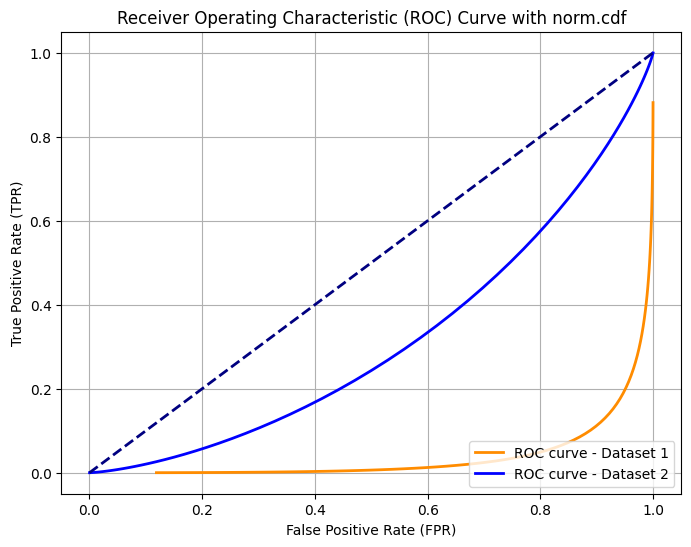
Area under the ROC curve : 0.542000
Optimal Threshold: 1.000453

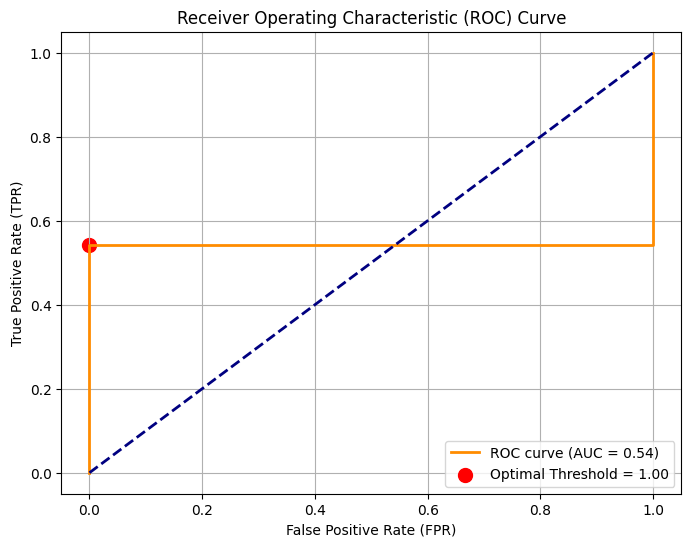
Area under the ROC curve : 0.542000
Optimal Threshold: 1.000453

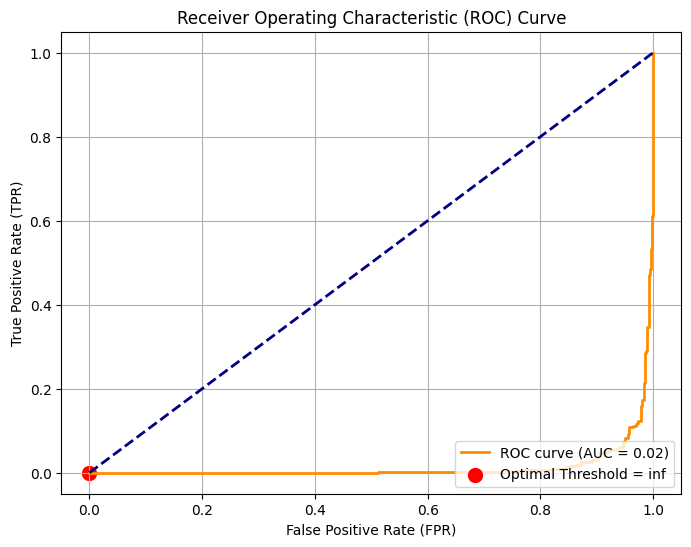
Area under the ROC curve : 0.015408
Optimal Threshold: inf

**Question 2.1**: Create four sinusoidal $ r(t) $ functions that will be used to create spike trains and PSTHs. These $ r(t) $ functions should have four distinct frequencies ranging between 1 Hz and 100 Hz. 


In [ ]:


frequencies = [10, 30, 60, 80]
total_time = 1.0  # Total time in seconds
num_trials = 20  # Number of trials
time_bins = 40  # Number of time bins between 30 to 50
sinusoids = []

# Generate sinusoidal functions
time = np.linspace(0, total_time, int(total_time * 1000), endpoint=False)  # Time vector in milliseconds
for frequency in frequencies:
    sinusoid = np.sin(2 * np.pi * frequency * time)
    sinusoids.append(sinusoid)

# Plot sinusoidal functions
plt.figure(figsize=(10, 6))

for i, sinusoid in enumerate(sinusoids, 1):
    plt.plot(time, sinusoid, label=f'Frequency {frequencies[i-1]} Hz', linestyle='-', linewidth=2)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sinusoidal Functions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



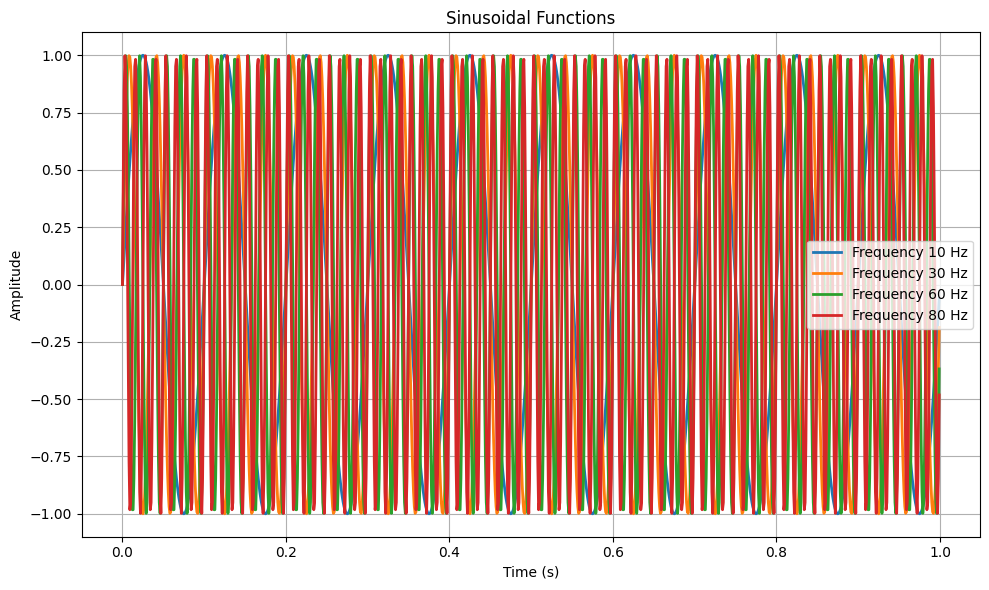

**Question 2.2**: Generate spike trains for each of the four $ r(t) $ functions. Use these spike trains to create "base PSTHs". For each base PSTH, simulate 20 trials and sum their spike trains to create a single column representing the PSTH of one neuron. Construct 24 such columns to represent the PSTHs of 24 neurons. Choose the number of time bins (rows) between 30 to 50 for the PSTHs.


In [ ]:

# Define parameters
frequency = 30  # Hz
total_time = 1.0 
num_trials = 20 
time_bins = 40  

all_base_psths = []
for i,sinusoid in enumerate(sinusoids,1):
    spike_train = (sinusoid > 0).astype(int)


# Create base PSTH and simulate trials
    base_psth = np.zeros(time_bins)
    trial_psths = []

    for _ in range(num_trials):
        trial_spikes = np.random.binomial(1, spike_train)  
        trial_psth, _ = np.histogram(np.where(trial_spikes == 1)[0], bins=time_bins, range=(0, total_time * 1000))
        trial_psths.append(trial_psth)

    # Calculate average PSTH
    average_psth = np.sum(trial_psths, axis=0) / num_trials
    all_base_psths.append(average_psth)
    
    plt.subplot(2, 2, i)
    plt.bar(np.arange(len(average_psth)), average_psth, width=0.8, alpha=0.7)
    plt.xlabel('Time Bins')
    plt.ylabel('Firing Rate per Bin')
    plt.title(f'PSTH - Frequency {frequencies[i-1]} Hz')
    plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()



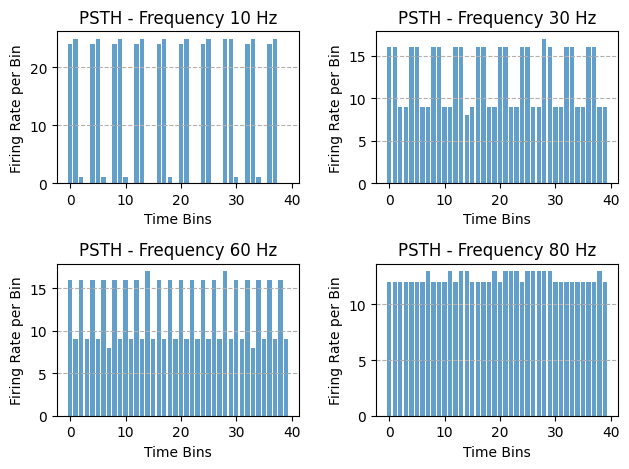

**Question 2.3**: Plot four two-dimensional PSTHs, each with a distinct spike frequency from the $ r(t) $ functions you have created. You might find it helpful to first create a function that generates the raster plots of 24 neurons for a single "trial". Running this function 20 times and summing the output will give you the PSTH of 24 neurons at a given spike frequency of $ r(t) $.

In [ ]:

import seaborn as sns

plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(all_base_psths, cmap='viridis', cbar_kws={'label': 'Firing Rate per Bin'})
y_ticks = np.arange(1, 5)
heatmap.set_yticks(y_ticks)
heatmap.set_yticklabels(y_ticks)

# Adjust x-axis ticks and labels to start from 1
x_ticks = np.arange(1, 41)
heatmap.set_xticks(x_ticks)
heatmap.set_xticklabels(x_ticks)

plt.xlabel('Time Bins')
plt.ylabel('Neuron Index')
plt.title('Population PSTH - All Frequencies')
plt.tight_layout()
plt.show()


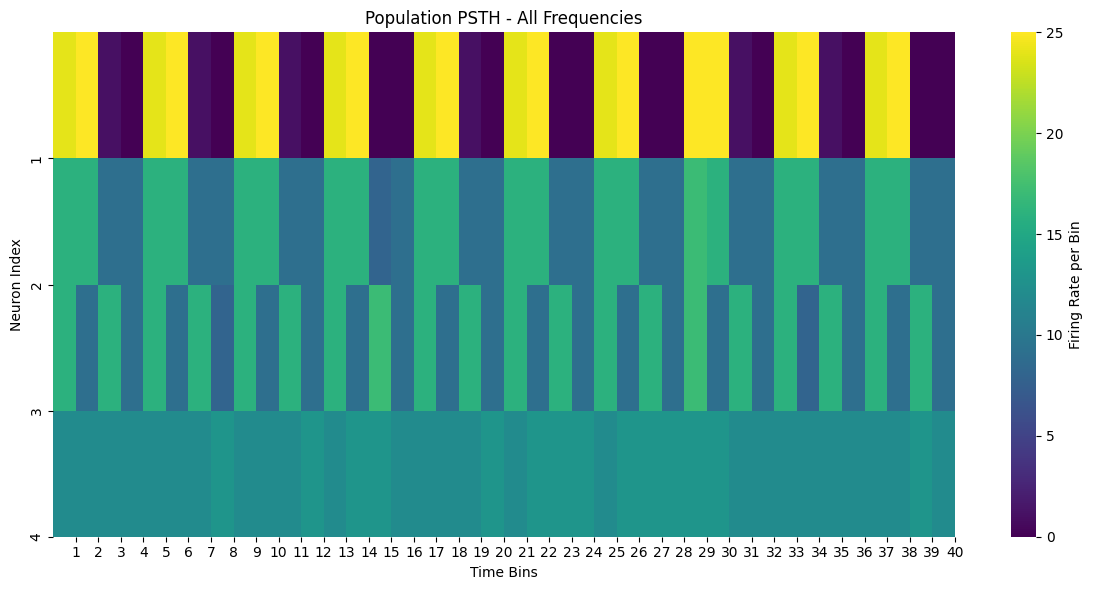